# Predicting heart disease with machine learning

## Problem Definition

Can we predict if a paitent has heart disease or not.
Type: Binary Classification.

## Data

Source:

- [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv)

Keys:

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Evaluation

Desired Accuracy: 92-95%



In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, roc_curve

In [271]:
def evaluate_classifier(Y_TRUE, Y_PREDS):
    accuracy = accuracy_score(Y_TRUE, Y_PREDS)
    precision = precision_score(Y_TRUE, Y_PREDS)
    recall = recall_score(Y_TRUE, Y_PREDS)
    f1 = f1_score(Y_TRUE, Y_PREDS)
    
    print(f"Accuracy: {accuracy * 100 :.2f} %")
    print(f"Precision: {precision :.2f}")
    print(f"Recall: {recall :.2f}")
    print(f"F1: {f1 :.2f}")
    
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1" : f1
    }

### Load Data

In [272]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Exploratory data analysis

Goal here is to find everything about the data and become an expert on it

In [273]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [274]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [275]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

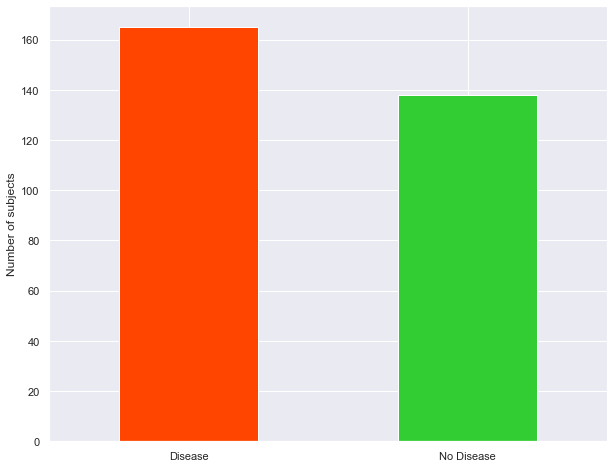

In [276]:
disease_vals = df["target"].value_counts()
disease_vals.index = ["Disease", "No Disease"]
disease_vals.plot(kind="bar", color=["orangered", "limegreen"], rot=0, figsize=(10,8), ylabel="Number of subjects")

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [278]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [279]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Finding Patterns

### Sex against Target

In [280]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [281]:
# comparing target and sex

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Females are more likely to have heart diseases

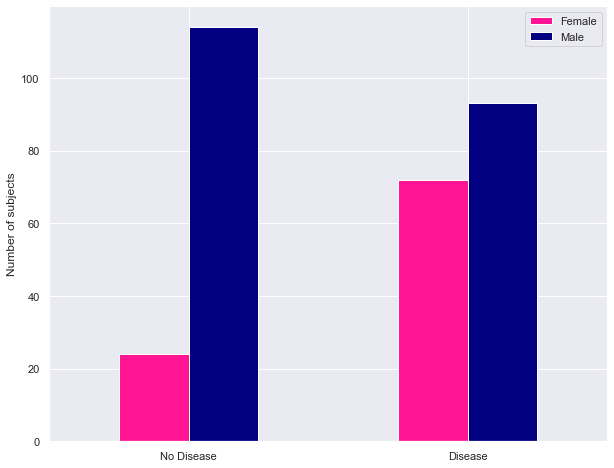

In [282]:
target_sex = pd.crosstab(df.target, df.sex)
target_sex.columns = ["Female", "Male"]
target_sex.index = ["No Disease", "Disease"]
target_sex.plot(kind="bar",
                color=["deeppink", "navy"],
                ylabel="Number of subjects",
                rot=0,
                figsize=(10,8));
# plt.xticks([0,1], ["a","v"])

### Target against Max Heart Rate and Age

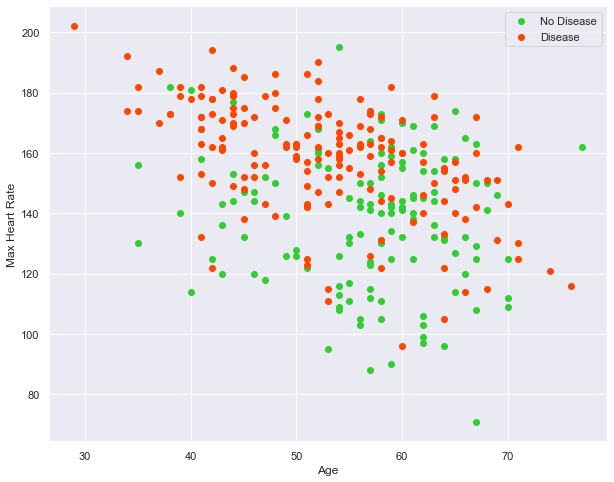

In [283]:
plt.figure(figsize=(10,8))
plt.scatter(df.age[df.target == 0], df.thalach[df.target== 0], color="limegreen")
plt.scatter(df.age[df.target == 1], df.thalach[df.target== 1], color="orangered")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["No Disease", "Disease"])
plt.show()

If a patient has higher maximum heart rate, the chance of a heart disease is high too
However we have more data in range of ages around 55-65

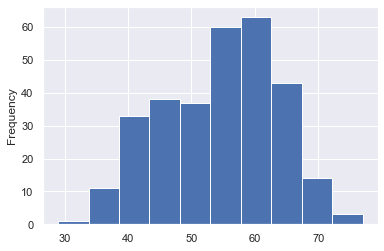

In [284]:
df.age.plot.hist();

### Chest pain against Target

In [285]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


cp - chest pain type
 * 0: Typical angina: chest pain related decrease blood supply to the heart
 * 1: Atypical angina: chest pain not related to heart
 * 2: Non-anginal pain: typically esophageal spasms (non heart related)
 * 3: Asymptomatic: chest pain not showing signs of disease

Anomaly:

- Type 2 pain is resulting in more heart diseases 

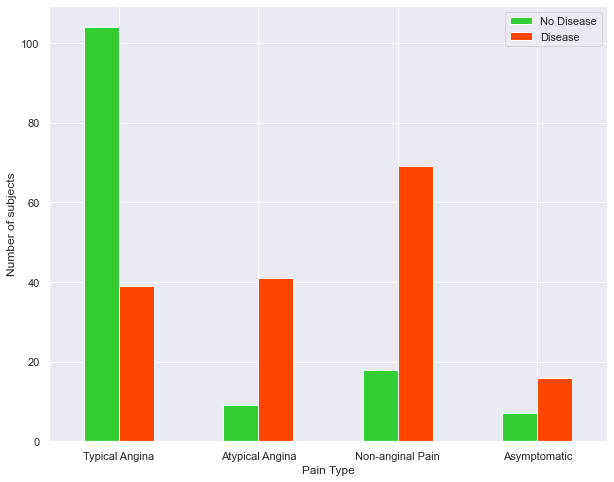

In [286]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,8),
                                    color=["limegreen", "orangered"],
                                    rot=0,
                                    xlabel="Pain Type",
                                    ylabel="Number of subjects")
plt.legend(["No Disease", "Disease"])
plt.xticks(ticks = list(range(4)), labels=["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
plt.show()

### Corelation Matrix

In [287]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


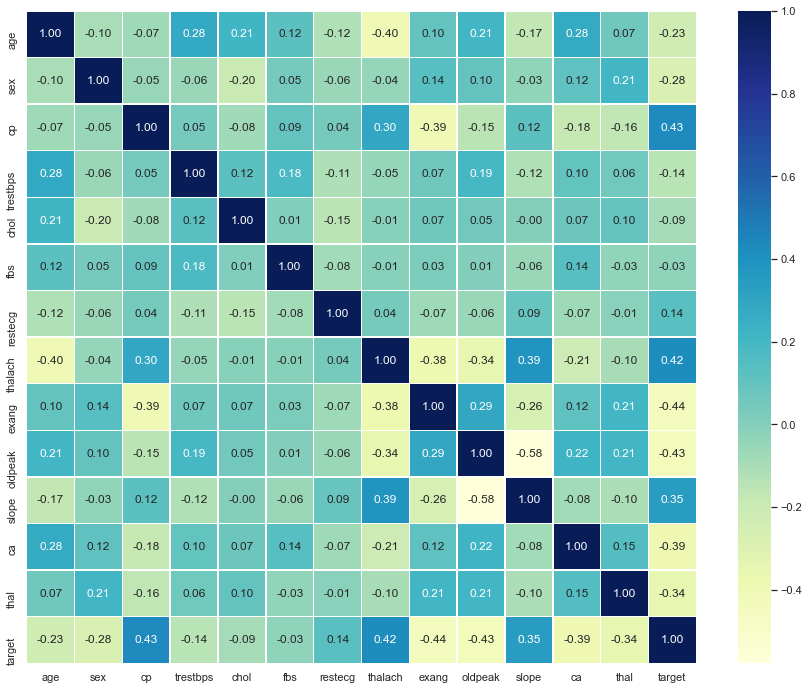

In [288]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
plt.show()

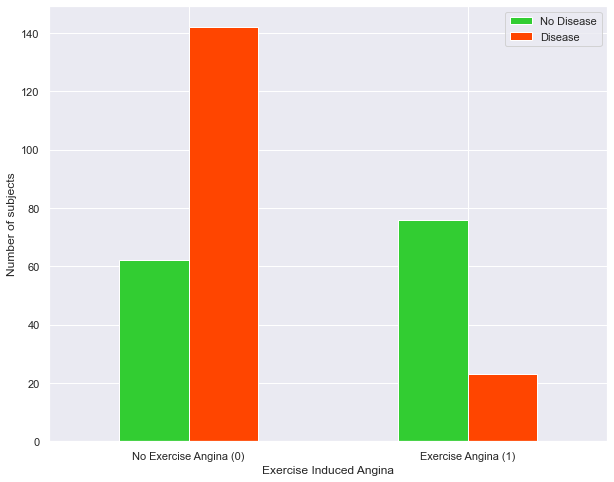

In [289]:
pd.crosstab(df.exang, df.target).plot(kind="bar", figsize=(10,8), color=["limegreen", "orangered"])
plt.xticks(ticks=list(range(2)), labels=["No Exercise Angina (0)", "Exercise Angina (1)"], rotation=0)
plt.legend(["No Disease", "Disease"])
plt.xlabel("Exercise Induced Angina")
plt.ylabel("Number of subjects")
plt.show()

## Preparing Data

In [290]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [291]:
X = df.drop("target", axis=1)
Y = df.target

np.random.seed(22)

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.2) 

## Modelling

1. Logistic Regressor
2. KNeighbour Classifier
3. Random Forest Classifier

In [292]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
} 

def fit_and_score(model, X_TRAIN=X_TRAIN, Y_TRAIN=Y_TRAIN, X_TEST=X_TEST, Y_TEST=Y_TEST):
    model.fit(X_TRAIN, Y_TRAIN)
    Y_PREDS = model.predict(X_TEST)
    return evaluate_classifier(Y_TEST, Y_PREDS)

In [293]:
model_scores = {}
for model_name, model in models.items():
    print(model_name)
    score = fit_and_score(model)
    model_scores[model_name] = score
    print()

Logistic Regression
Accuracy: 81.97 %
Precision: 0.83
Recall: 0.85
F1: 0.84

KNN
Accuracy: 65.57 %
Precision: 0.68
Recall: 0.74
F1: 0.70

Random Forest
Accuracy: 78.69 %
Precision: 0.78
Recall: 0.85
F1: 0.82



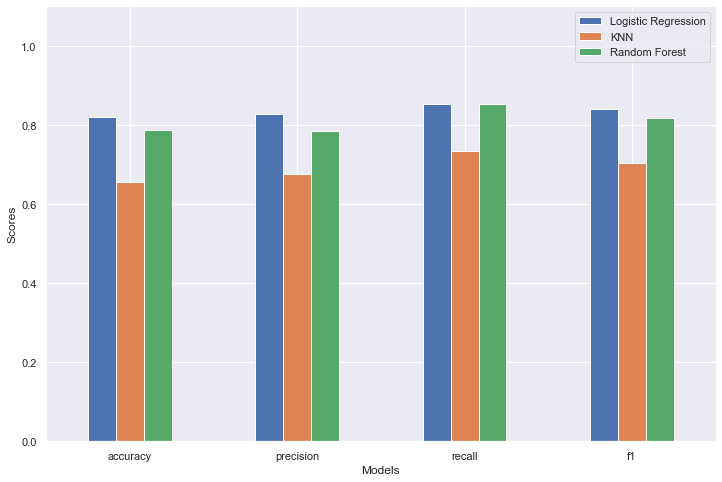

In [294]:
pd.DataFrame(model_scores).plot.bar(figsize=(12,8))
plt.ylabel("Scores")
plt.xlabel("Models")
plt.xticks(rotation=0)
plt.ylim((0, 1.1))
plt.show()

### Tuning KNN

In [295]:
knn = KNeighborsClassifier()
neighbors = range(10, 60)

train_score = []
test_score = []

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_TRAIN, Y_TRAIN)
    
    train_score.append(knn.score(X_TRAIN, Y_TRAIN))
    test_score.append(knn.score(X_TEST, Y_TEST))
    



Best Accuracy of 70.49 with n_neighbor: 40



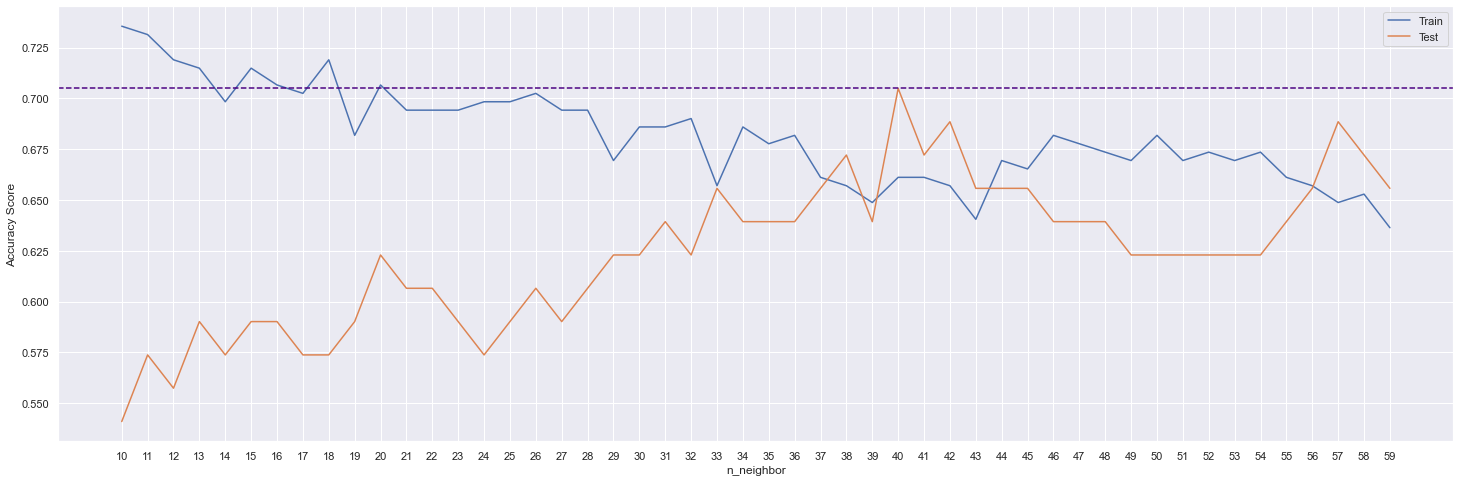

In [296]:
plt.figure(figsize=(25,8))
plt.plot(neighbors, train_score, label="Train")
plt.plot(neighbors, test_score, label="Test")
plt.axhline(max(test_score), color="indigo", linestyle="--")
plt.xlabel("n_neighbor")
plt.ylabel("Accuracy Score")
plt.legend()
plt.xticks(neighbors)
print(f"Best Accuracy of {max(test_score) * 100 :.2f} with n_neighbor: {neighbors[test_score.index(max(test_score))]}")
print()
plt.show()


### Tuning Logistic Regression & Random Forest with RandomSearchCV

In [297]:
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"],
    'penalty' : ['l1', 'l2'],
}

rs_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_grid, n_iter=20, cv=5, verbose=True)
rs_log_reg.fit(X_TRAIN, Y_TRAIN)

print(rs_log_reg.best_params_)
print()
log_reg_score = evaluate_classifier(Y_TEST, rs_log_reg.predict(X_TEST))



Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'solver': 'liblinear', 'penalty': 'l2', 'C': 29.763514416313132}

Accuracy: 81.97 %
Precision: 0.83
Recall: 0.85
F1: 0.84


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


### Tuning Logistic Regression & Random Forest with GridSearchCV

In [298]:
log_reg_grid = {
    "C": np.logspace(-10, 10, 80),
    "solver": ["liblinear"],
    'penalty' : ['l1'],
}

gs_log_reg = GridSearchCV(LogisticRegression(), log_reg_grid, cv=3, verbose=1)
gs_log_reg.fit(X_TRAIN, Y_TRAIN)

print(gs_log_reg.best_params_)
print()
log_reg_score = evaluate_classifier(Y_TEST, gs_log_reg.predict(X_TEST))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 80 candidates, totalling 240 fits
{'C': 0.4171124612056533, 'penalty': 'l1', 'solver': 'liblinear'}

Accuracy: 81.97 %
Precision: 0.83
Recall: 0.85
F1: 0.84


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    2.8s finished


In [299]:
rand_clas = {'accuracy': 0.8032786885245902,
 'precision': 0.8055555555555556,
 'recall': 0.8529411764705882,
 'f1': 0.8285714285714286}

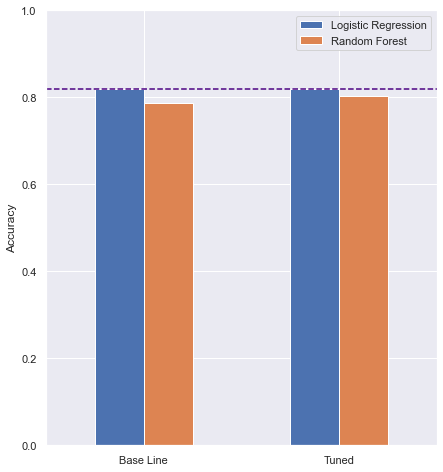

In [300]:
scores_df_plot = pd.DataFrame(index=["Base Line", "Tuned"], columns=["Logistic Regression", "Random Forest"])
scores_df_plot[:1] = np.array([model_scores["Logistic Regression"]["accuracy"], model_scores["Random Forest"]["accuracy"]]).reshape(1, -1)
scores_df_plot[1:2] = np.array([log_reg_score["accuracy"], rand_clas["accuracy"]]).reshape(1, -1)

scores_df_plot.plot(kind="bar", figsize=(7, 8))
plt.axhline(scores_df_plot.max().max(), color="indigo", linestyle="--")
plt.xticks(rotation=0)
plt.ylabel("Accuracy")
plt.ylim((0, 1))
plt.show()
del scores_df_plot


### Chosen model: Logistic Regression

## Evaluating Model

In [301]:
model = LogisticRegression(max_iter=1000, solver="liblinear", penalty="l1")
model.fit(X_TRAIN, Y_TRAIN)
Y_PREDS = model.predict(X_TEST)

### Evaluation Metrics

- ROC and AUC
- Confusion Matrix
- Classification Report
- Precision
- Recall
- F1 Score

### ROC

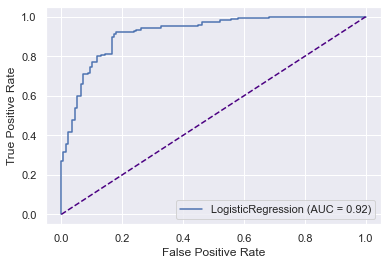

In [302]:
sns.set(font_scale=1)
plot_roc_curve(model, X, Y)
plt.plot([0,1], linestyle="--", color=("indigo"))
plt.show()

## Confusion Matrix

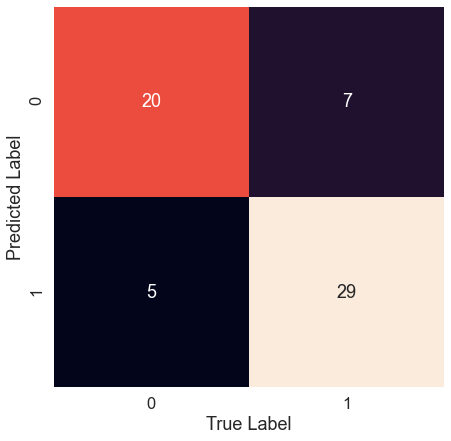

In [303]:
sns.set(font_scale=1.5)
matrix = confusion_matrix(Y_TEST, Y_PREDS)
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(matrix, annot=True, cbar=False)
plt.ylabel("Predicted Label")
plt.xlabel("True Label")
plt.show()

## Classification Report

In [304]:
print(classification_report(Y_TEST, Y_PREDS))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.81      0.85      0.83        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



## Classification Report with Cross Validation

In [305]:
model = LogisticRegression(max_iter=1000, solver="liblinear", penalty="l1")

cv_accuracy = cross_val_score(model, X, Y, cv=5, scoring="accuracy").mean()
cv_precision = cross_val_score(model, X, Y, cv=5, scoring="precision").mean()
cv_recall = cross_val_score(model, X, Y, cv=5, scoring="recall").mean()
cv_f1 = cross_val_score(model, X, Y, cv=5, scoring="f1").mean()

cv_metrics = pd.DataFrame({
    "Accuracy": cv_accuracy,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "F1": cv_f1
}, index=["Mean"])

cv_metrics

,Accuracy,Precision,Recall,F1
Mean,0.821639,0.807592,0.890909,0.845661


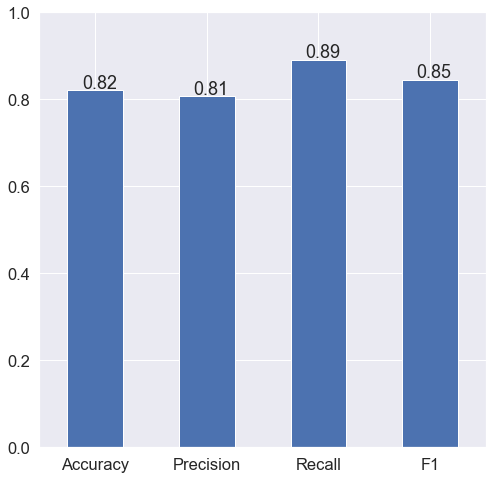

In [316]:
cv_metrics.T.plot(kind="bar", legend=False, figsize=(8, 8));
plt.xticks(rotation=0)
plt.ylim((0,1))
for i, v in enumerate(np.array(cv_metrics)[0]):
    plt.text(i - 0.12, v+ 0.005, round(v, 2))
plt.show()

## Feature Importance

In [307]:
model = LogisticRegression(max_iter=1000, solver="liblinear", penalty="l1")
model.fit(X_TRAIN, Y_TRAIN)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [308]:
model.coef_

array([[ 0.00251488, -1.43980987,  0.87709587, -0.01401094, -0.00371785,
        -0.15922286,  0.5230237 ,  0.03838448, -0.33140476, -0.58572717,
         0.20059827, -0.68954808, -0.97957549]])

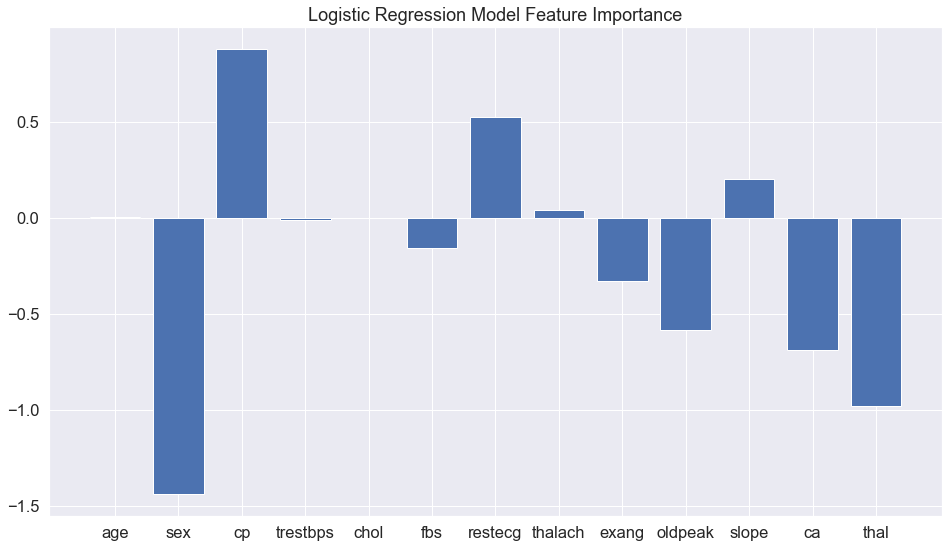

In [315]:
feature_dict = dict(zip(df.columns, list(model.coef_[0])))

plt.figure(figsize=(16, 9))
plt.bar(feature_dict.keys(), feature_dict.values())
plt.title("Logistic Regression Model Feature Importance")
plt.show()